In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('deliveries.csv')

In [5]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [9]:
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
5,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,6,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
6,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,7,BB McCullum,P Kumar,SC Ganguly,0,1,1,legbyes,0,NaN,NaN,NaN
7,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,BB McCullum,Z Khan,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
8,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN
9,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,Z Khan,SC Ganguly,4,0,4,NaN,0,NaN,NaN,NaN


In [11]:
df.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batter',
 'bowler',
 'non_striker',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'extras_type',
 'is_wicket',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [13]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [15]:
df.shape

(260920, 17)

In [17]:
#Top Batsman by Runs

top_batsman = df.groupby('batter')['total_runs'].sum().reset_index()
tbat = top_batsman.sort_values(by = 'total_runs', ascending = False).head(10)
print(tbat)

             batter  total_runs
631         V Kohli        8307
512        S Dhawan        7119
147       DA Warner        6910
477       RG Sharma        6884
546        SK Raina        5780
374        MS Dhoni        5505
30   AB de Villiers        5354
124        CH Gayle        5336
501      RV Uthappa        5246
282      KD Karthik        5066


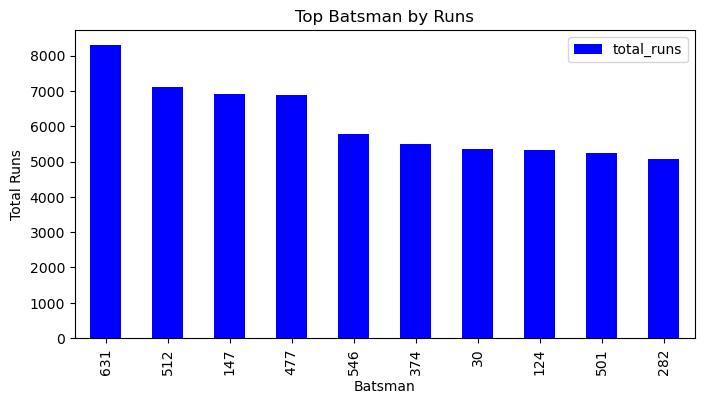

In [19]:
tbat.plot( kind = 'bar', color = 'blue', figsize=(8,4))
plt.title("Top Batsman by Runs")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.show()

In [21]:
#Top Bowlers by Wickets

top_bowler = df.groupby('bowler')['is_wicket'].sum().reset_index()
tbowl = top_bowler.sort_values(by = 'is_wicket', ascending = False).head(10)
print(tbowl)

         bowler  is_wicket
524   YS Chahal        213
119    DJ Bravo        207
348   PP Chawla        201
446   SP Narine        200
355    R Ashwin        198
71      B Kumar        195
438  SL Malinga        188
8      A Mishra        183
193   JJ Bumrah        182
373   RA Jadeja        169


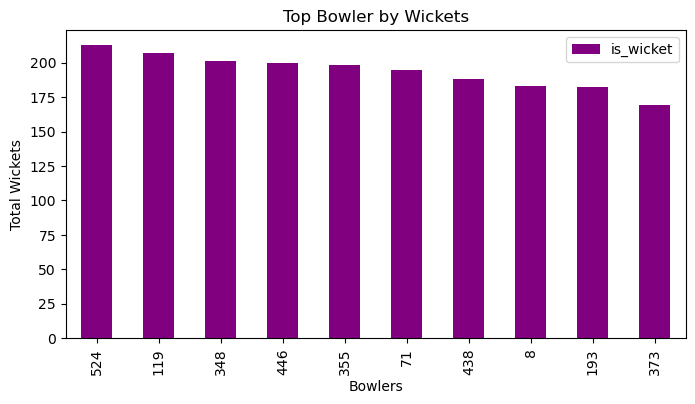

In [23]:
tbowl.plot( kind = 'bar', color = 'purple', figsize=(8,4))
plt.title("Top Bowler by Wickets")
plt.xlabel("Bowlers")
plt.ylabel("Total Wickets")
plt.show()

In [25]:
df['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [27]:
#Dismissal Types

dismissal_types = df['dismissal_kind'].value_counts()
print(dismissal_types)

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


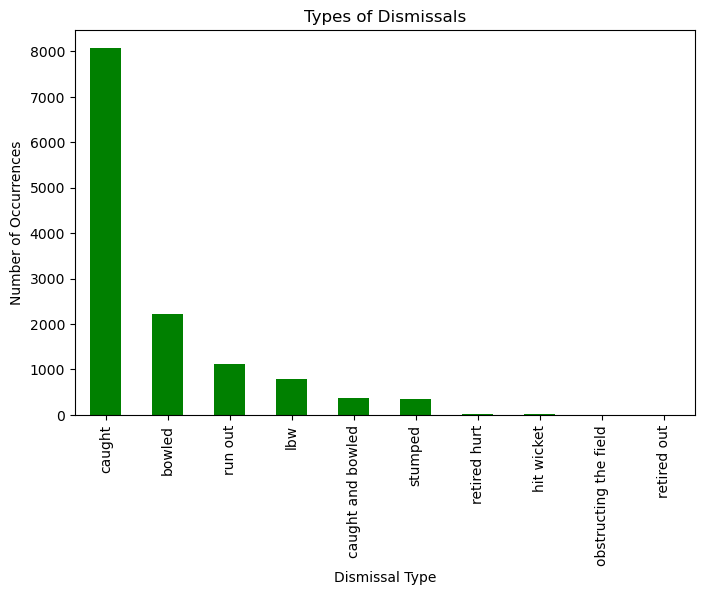

In [29]:
dismissal_types.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Types of Dismissals')
plt.xlabel('Dismissal Type')
plt.ylabel('Number of Occurrences')
plt.show()

In [31]:
#Team Performance Comparison 

team_compare = df.groupby('batting_team')['total_runs'].sum().reset_index().sort_values(by = 'total_runs', ascending = False).head(10)
print(team_compare)

                   batting_team  total_runs
10               Mumbai Indians       42176
8         Kolkata Knight Riders       39331
0           Chennai Super Kings       38629
16  Royal Challengers Bangalore       37692
13             Rajasthan Royals       34747
6               Kings XI Punjab       30064
18          Sunrisers Hyderabad       29071
3              Delhi Daredevils       24296
2                Delhi Capitals       14900
1               Deccan Chargers       11463


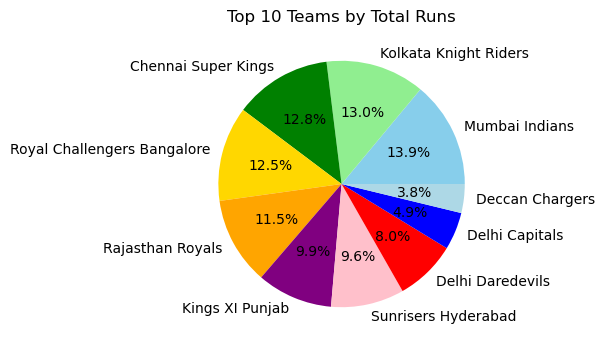

In [33]:
colors = ['skyblue', 'lightgreen', 'green', 'gold', 'orange', 'purple', 'pink', 'red', 'blue', 'lightblue']
plt.figure(figsize=(4, 4))
plt.pie(team_compare['total_runs'], labels=team_compare['batting_team'], colors=colors, autopct='%1.1f%%')
plt.title('Top 10 Teams by Total Runs')
#plt.axis('equal')
plt.show()

In [35]:
#Impact of Toss on match outcome



In [37]:
df.columns.tolist()

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batter',
 'bowler',
 'non_striker',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'extras_type',
 'is_wicket',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

In [61]:
#Run Distribution by Over

run_disby_over = df.groupby('over')['total_runs'].sum().reset_index()
print(run_disby_over)

    over  total_runs
0      0       13651
1      1       16163
2      2       17895
3      3       18415
4      4       18565
5      5       18528
6      6       14839
7      7       15981
8      8       16639
9      9       16353
10    10       16779
11    11       17076
12    12       17205
13    13       17634
14    14       18149
15    15       18472
16    16       19012
17    17       19559
18    18       19076
19    19       17765


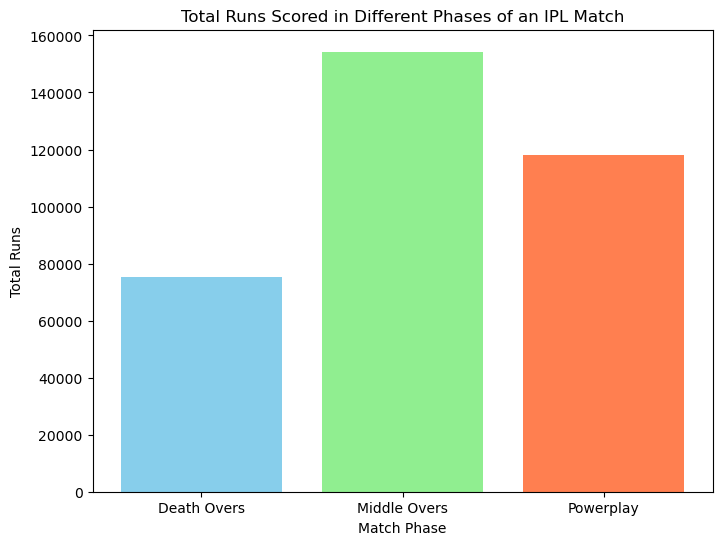

In [63]:
#Run Distribution by Over

def categorize_overs(over):            #function to segregate the overs in powerplay, middle overs, death overs
    if 0 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'
df['over phase'] = df['over'].apply(categorize_overs)  #creating table to assign phase to each overs
runs_by_phase = df.groupby('over phase')['total_runs'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(runs_by_phase['over phase'], runs_by_phase['total_runs'], color=['skyblue', 'lightgreen', 'coral'])
plt.xlabel('Match Phase')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Different Phases of an IPL Match')
plt.show()

#run_disby_over = df.groupby('over')['total_runs'].sum().reset_index()
#print(run_disby_over)

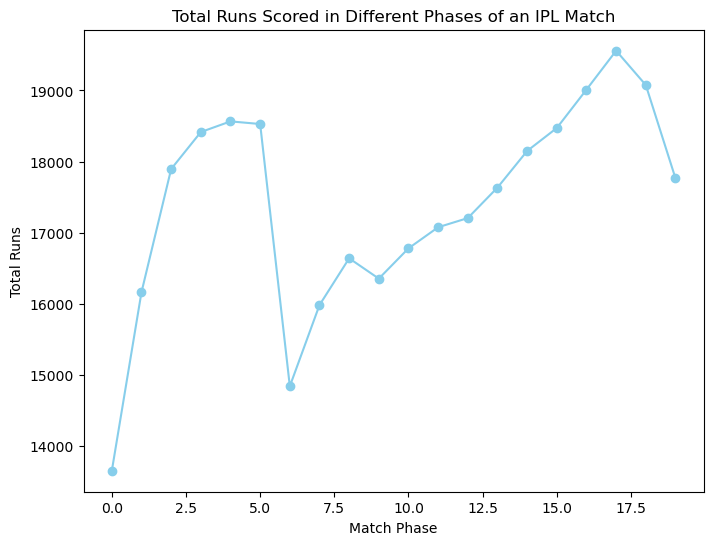

In [73]:
#Run Distribution by Over

plt.figure(figsize=(8, 6))
plt.plot(run_disby_over['over'], run_disby_over['total_runs'], color='skyblue', marker = 'o')
plt.xlabel('Match Phase')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Different Phases of an IPL Match')
plt.show()

#run_disby_over = df.groupby('over')['total_runs'].sum().reset_index()
#print(run_disby_over)

In [49]:
#Extra Breakdowns

#extra = df['extras_type'].unique()
#print(extra)
#team = df['batting_team'].unique()
#print(team)
#specific_team = df.groupby('extra')['team'].sum().reset_index()
#print(specific_team)

#specific_team = df.groupby(['extras_type', 'batting_team']).size().reset_index(name='count')
#print(specific_team)

In [51]:
#Extras Breakdown
extras_df = df[df['extras_type'].notnull()]
extras_breakdown = extras_df['extras_type'].value_counts().reset_index()

specific_extras = extras_breakdown[extras_breakdown['extras_type'].isin(['wides', 'noballs', 'byes','legbyes','penalty'])]
print(specific_extras)

  extras_type  count
0       wides   8380
1     legbyes   4001
2     noballs   1069
3        byes    673
4     penalty      2


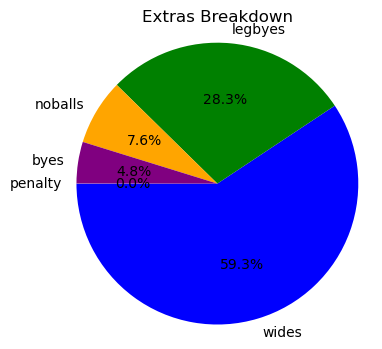

In [55]:

colors = ['blue', 'green', 'orange', 'purple', 'pink']
plt.figure(figsize=(4, 4))
plt.pie(specific_extras['count'], labels=specific_extras['extras_type'], colors=colors, autopct='%1.1f%%', startangle = 180)
plt.title('Extras Breakdown')
plt.axis('equal')
plt.show()

# 